# Glastonbury Announcement

In [11]:
import praw
import pandas as pd
from datetime import datetime

# Initialize PRAW with your Reddit API credentials
reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID', 
    client_secret='YOUR_CLIENT_SECRET', 
    user_agent='YOUR_USER_AGENT'
)

# List of Reddit post URLs
post_urls = [
    'https://www.reddit.com/r/seventeen/comments/1beg7og/240314_seventeen_will_be_performing_at/',
    'https://www.reddit.com/r/glastonbury_festival/comments/1bfbgfg/ask_anything_about_seventeen/',
    'https://www.reddit.com/r/kpop/comments/1beg67p/seventeen_to_perform_at_glastonbury_festival_2024/'
]

# List to store comments
comments_list = []

# Function to extract comments from a post
def extract_comments(post_url):
    submission = reddit.submission(url=post_url)
    post_created_at = datetime.fromtimestamp(submission.created_utc)
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        try:
            comment_created_at = datetime.fromtimestamp(comment.created_utc)
            time_difference = (comment_created_at - post_created_at).total_seconds() / 60  # Time difference in minutes
            comment_length = len(comment.body)  # Length of the comment text

            # Append data to the list
            comments_list.append([
                comment.id, 
                comment.body, 
                comment.score,  # Number of likes (upvotes)
                comment_created_at,  # Comment submission date
                post_created_at,  # Post creation date
                time_difference,  # Time difference between post creation and comment submission
                comment_length  # Length of the comment
            ])
        except Exception as e:
            print(f"An error occurred: {e}")

# Extract comments from each post
for url in post_urls:
    extract_comments(url)

# Create a DataFrame and store comments
glastonbury_annoucement_df = pd.DataFrame(comments_list, columns=['Comment_ID', 'Text', 'Likes', 'Comment_Date', 'Post_Date', 'Time_Difference',  'Comment_Length'])

# Display dataframe
display(glastonbury_annoucement_df)

,Comment_ID,Text,Likes,Comment_Date,Post_Date,Time_Difference,Comment_Length
0,kut26cs,Hi there! Please make sure to include the sour...,1,2024-03-14 08:17:35,2024-03-14 08:17:34,0.016667,359
1,kutbf1s,Guess whose sister in law has Glasto tickets? ...,149,2024-03-14 10:11:47,2024-03-14 08:17:34,114.216667,309
2,kut87ta,Finally a festival I can go to *remembers Glas...,72,2024-03-14 09:34:09,2024-03-14 08:17:34,76.583333,109
3,kutctkr,"Glastonbury is actually insane, I couldn’t bel...",35,2024-03-14 10:27:25,2024-03-14 08:17:34,129.850000,159
4,kut446h,ok ok but what is the possibility of Glastonbu...,117,2024-03-14 08:42:36,2024-03-14 08:17:34,25.033333,175
...,...,...,...,...,...,...,...
403,kutda71,They absolutely would be shocked 😂 I think the...,6,2024-03-14 10:32:25,2024-03-14 08:14:40,137.750000,137
404,kutrvoy,Oh no I completely misunderstood that 😂 I thin...,6,2024-03-14 12:43:02,2024-03-14 08:14:40,268.366667,95
405,kuta4r4,"Some confusion maybe, but SVT could put togeth...",8,2024-03-14 09:56:57,2024-03-14 08:14:40,102.283333,165
406,kuvuc5d,Maybe this is my American showing but SZA is m...,7,2024-03-14 19:51:07,2024-03-14 08:14:40,696.450000,93


In [12]:
# Remove rows where the comment is marked as removed, deleted, or flagged by a bot
filtered_df = glastonbury_annoucement_df[
    ~glastonbury_annoucement_df['Text'].str.contains('removed|deleted|bot', case=False, na=False)
]

# Drop the 'Post_Date' column
filtered_df = filtered_df.drop(columns=['Post_Date'])

# Display the filtered DataFrame
display(filtered_df)

,Comment_ID,Text,Likes,Comment_Date,Time_Difference,Comment_Length
1,kutbf1s,Guess whose sister in law has Glasto tickets? ...,149,2024-03-14 10:11:47,114.216667,309
2,kut87ta,Finally a festival I can go to *remembers Glas...,72,2024-03-14 09:34:09,76.583333,109
3,kutctkr,"Glastonbury is actually insane, I couldn’t bel...",35,2024-03-14 10:27:25,129.850000,159
4,kut446h,ok ok but what is the possibility of Glastonbu...,117,2024-03-14 08:42:36,25.033333,175
5,kut4rq2,"This is insane I’m so happy for them, but it i...",79,2024-03-14 08:50:58,33.400000,151
...,...,...,...,...,...,...
403,kutda71,They absolutely would be shocked 😂 I think the...,6,2024-03-14 10:32:25,137.750000,137
404,kutrvoy,Oh no I completely misunderstood that 😂 I thin...,6,2024-03-14 12:43:02,268.366667,95
405,kuta4r4,"Some confusion maybe, but SVT could put togeth...",8,2024-03-14 09:56:57,102.283333,165
406,kuvuc5d,Maybe this is my American showing but SZA is m...,7,2024-03-14 19:51:07,696.450000,93


In [13]:
# Save the DataFrame to a CSV file
filtered_df.to_csv('glastonbury_announcement_dataset.csv')
display(filtered_df.describe())

,Likes,Comment_Date,Time_Difference,Comment_Length
count,391.000000,391,391.000000,391.000000
mean,13.639386,2024-03-18 13:29:30.127877120,5536.362404,185.751918
min,-18.000000,2024-03-14 08:16:38,1.966667,2.000000
25%,2.000000,2024-03-14 10:20:10,92.800000,67.500000
50%,5.000000,2024-03-14 16:18:57,212.900000,130.000000
75%,14.000000,2024-03-15 14:13:30,493.300000,235.000000
max,266.000000,2024-07-24 12:50:54,188739.616667,1082.000000
std,27.410374,NaN,25555.695931,177.800284


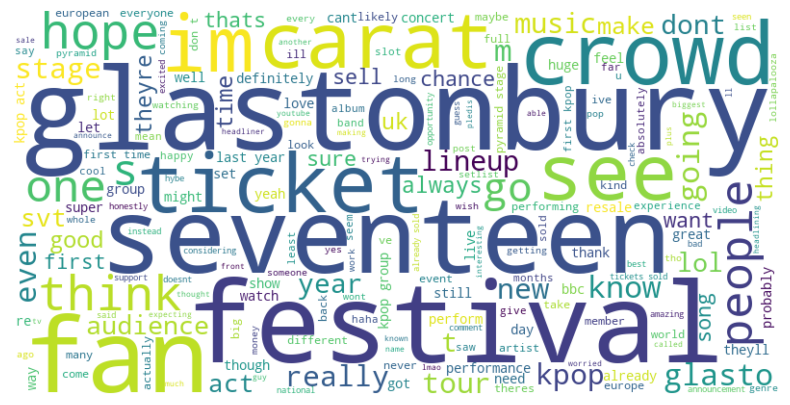

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Text processing for word cloud
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Combine all comments into a single string
all_text = ' '.join(filtered_df['Text'].apply(preprocess_text))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

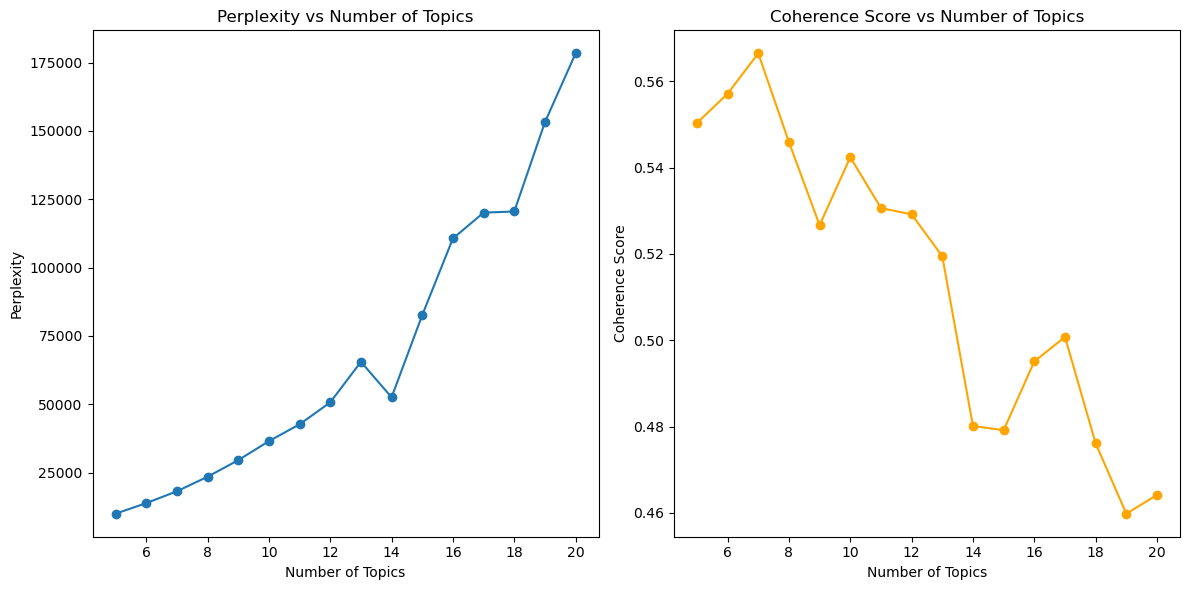

In [17]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re
from nltk.corpus import stopwords

# Define a function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Tokenization
    blob = TextBlob(text)
    tokens = blob.words
    # Lemmatization
    lemmatized_tokens = [word.lemmatize() for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Create a copy of the DataFrame
filtered_df = filtered_df.copy()

# Apply preprocessing to the 'Text' column
filtered_df['Processed_Text'] = filtered_df['Text'].apply(preprocess_text)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_df['Processed_Text'])

# Function to compute perplexity
def compute_perplexity(model, X):
    return model.perplexity(X)

# Function to compute coherence score (using gensim)
def compute_coherence_score(lda_model, corpus, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Prepare data for coherence score
# Convert processed text to list of lists of words for Gensim
corpus = [text.split() for text in filtered_df['Processed_Text']]
dictionary = corpora.Dictionary(corpus)
corpus_gensim = [dictionary.doc2bow(doc) for doc in corpus]  # Convert to bag-of-words format

num_topics_range = range(5, 21)  # Adjust range as needed
perplexity_scores = []
coherence_scores = []

for n_topics in num_topics_range:
    # Create and fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(X)
    
    # Compute perplexity
    perplexity = compute_perplexity(lda, X)
    perplexity_scores.append(perplexity)
    
    # Convert sklearn LDA to gensim LDA for coherence score calculation
    lda_gensim = gensim.models.LdaModel(corpus=corpus_gensim, id2word=dictionary, num_topics=n_topics)
    coherence_score = compute_coherence_score(lda_gensim, corpus, dictionary)
    coherence_scores.append(coherence_score)

# Plot perplexity scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_topics_range, perplexity_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')

# Plot coherence scores
plt.subplot(1, 2, 2)
plt.plot(num_topics_range, coherence_scores, marker='o', color='orange')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')

plt.tight_layout()
plt.show()


Topic #0:
good glastonbury week resale seventeen like need register thinking ve

Topic #1:
festival glasto ticket happy set like pyramid tour amazing wa

Topic #2:
hope glastonbury fan time pyramid seventeen festival thanks stage europe

Topic #3:
vernon fan going lol year carat day glasto thought hope

Topic #4:
festival glastonbury year time ticket fan kpop world yes crowd

Topic #5:
ticket seventeen hope pop chance make resale old carat crowd

Topic #6:
ticket like sold know post glastonbury cool op great went



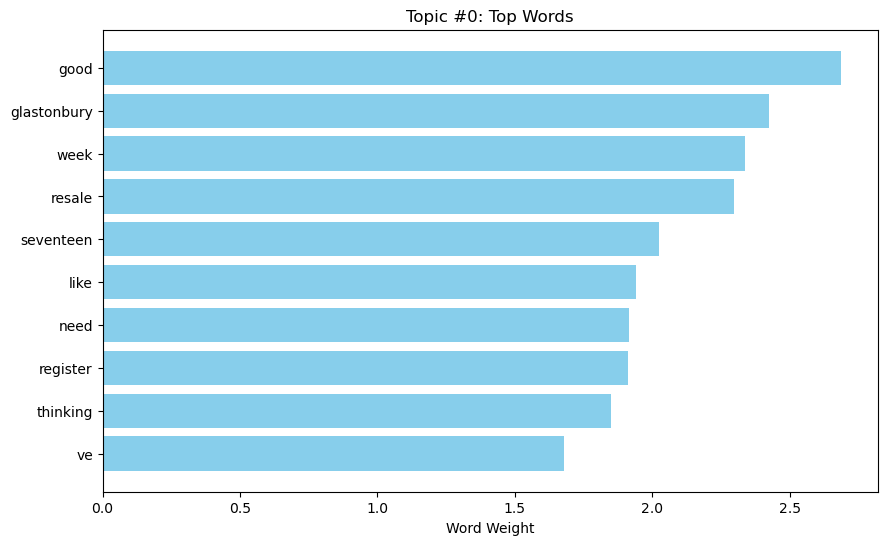

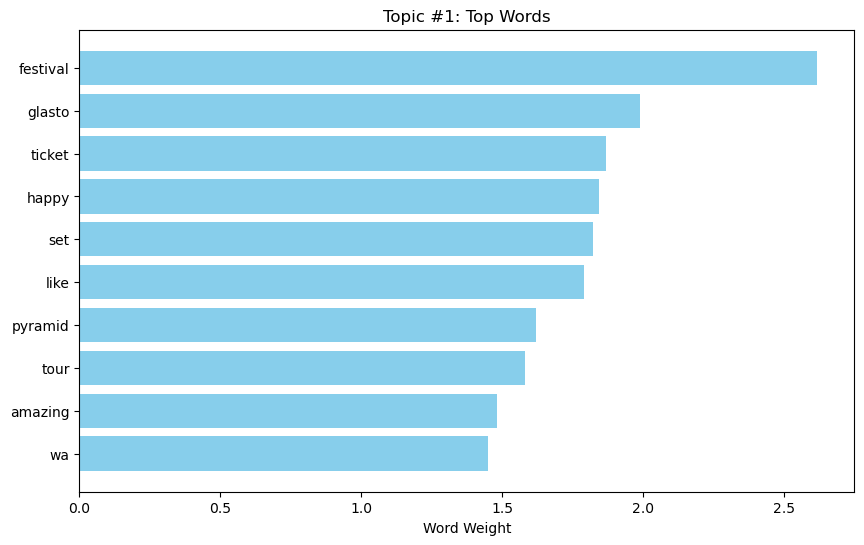

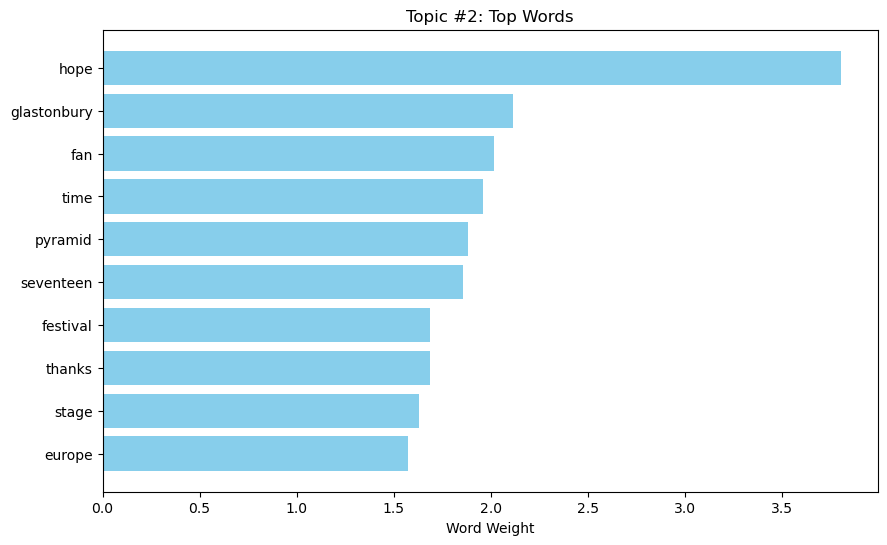

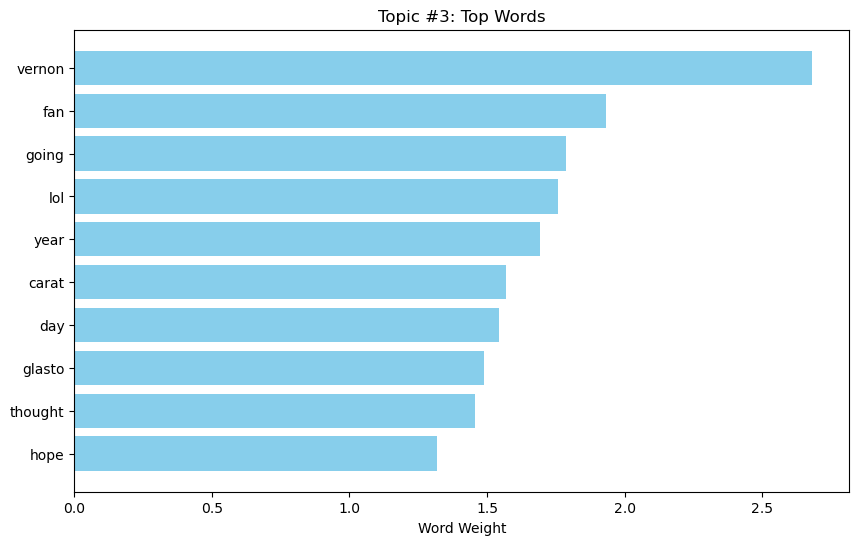

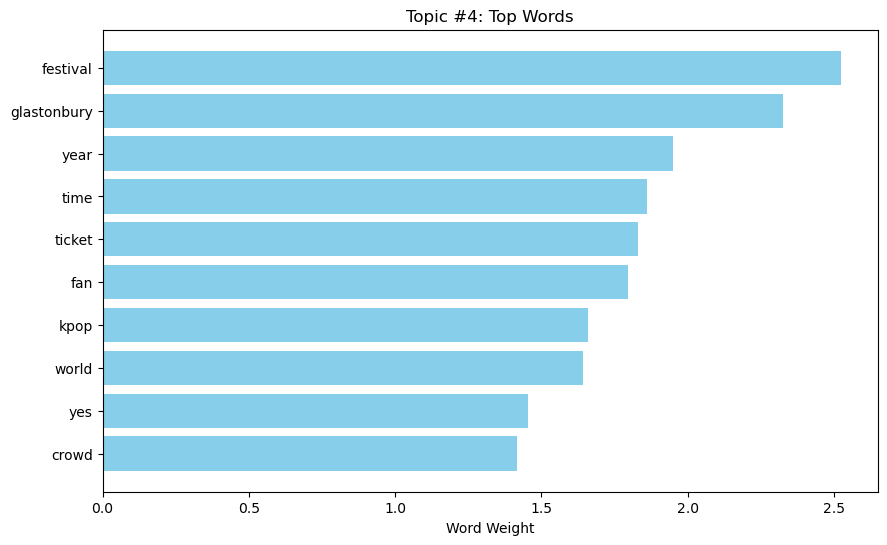

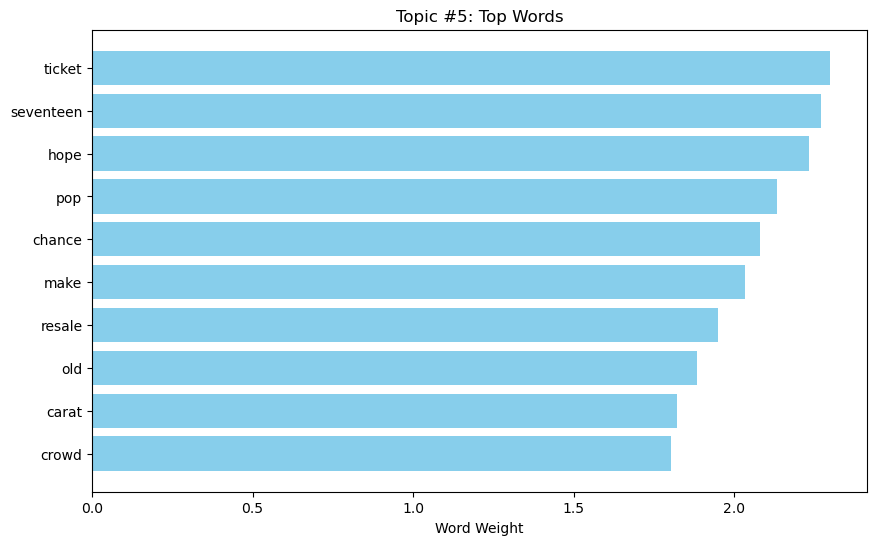

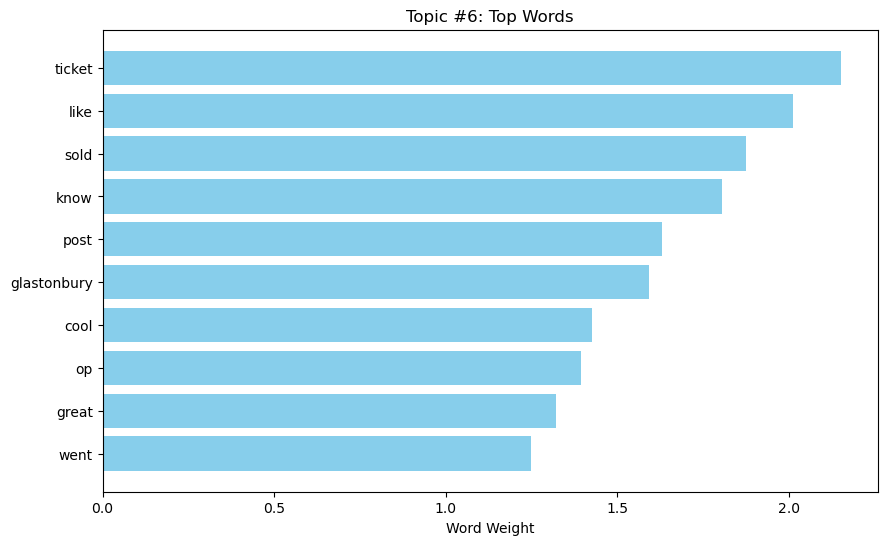

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_df['Processed_Text'])

# Perform Latent Dirichlet Allocation (LDA) with 7 topics
n_topics = 7
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(X)

# Function to print the top words for each topic
def print_top_words(model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        print()

# Function to plot the top words for each topic
def plot_top_words(model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]
        
        plt.figure(figsize=(10, 6))
        plt.barh(top_words, top_weights, color='skyblue')
        plt.gca().invert_yaxis()
        plt.title(f'Topic #{topic_idx}: Top Words')
        plt.xlabel('Word Weight')
        plt.show()

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Print topics
print_top_words(lda, feature_names)

# Plot top words for each topic
plot_top_words(lda, feature_names)
